## Analysis of single-emitter photophysics
<br>Calculates and/or plots:
<br>Intensity traces
<br>Total on-time per molecule
<br>Total number of photons per molecule
<br>Photon flux per molecule
<br>Number of blinks per molecule
<br>On-state time per molecule
<br>Duty cycle

In [1]:
import os
import numpy as np
import csv
from pylab import figure, text, scatter, show
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import lognorm
from scipy.stats import norm
import scipy.stats as ss
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.stats import kde
import import_csv_data as icd
import PhotophysicalProps_plotting as PPplt

### Section 1- Set variables
This is the only section of the code that should be modified. 
<br>Define values for:
    <br>- exposure_time: length of time of each frame (seconds)
    <br>- number_of_frames: total number of frames in movie
    <br>- intensity_threshold: background pixel value above a molecule is determined as in the on-state (photons)
   <br> - movie_number: number of movies in the folder being analysed
   <br> - repeat number: number of repeats   

In [2]:
subfolder_name= '500pM_AF647_PVA_Analysis'
folder='/Users/Lisa-MariaNeedham/OneDrive - University of Cambridge/Code/PhotophysicalProperties_master/Data/'+subfolder_name
exposure_time=0.02 #in seconds
number_of_frames=5000
intensity_threshold=200 #above which molecules will be counted as 'on'

In [3]:
#Make folder for plots if not exist
if not os.path.exists(folder+'/Figures'):
    os.makedirs(folder+'/Figures/PDFs')
    os.makedirs(folder+'/Figures/PNGs')

### Section 2- Import data and Extract parameters 
<br>Import.txt data, using fn_import_csv function. Delete header row and columns containing co-ordinates.
<br>From raw data the cell below extracts:
    <br>-total number of photons per molecule
    <br>-total on-state time per molecule
    <br>-on and off frames as 1,0. Used later to calculate number of blinks and 
    <br>-total off-state time per molecule
    <br>Groups all data from movies in folder into one variable
    <br>Plots intensity traces for a a random subset of molecules in data set and saves as PNGs and PDFs
    

In [4]:
total_photon = [] #notes down the total number of photons per particle
on_time=[]
on_time_sum=[]
off_time_sum=[]
total_blinks=[]
time=np.arange(0,((number_of_frames+1)*exposure_time),exposure_time)

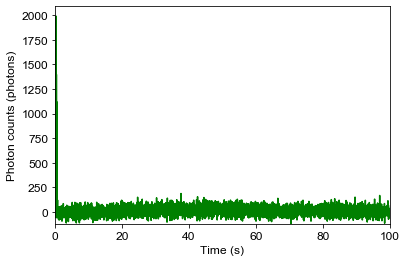

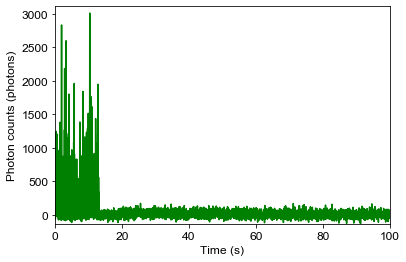

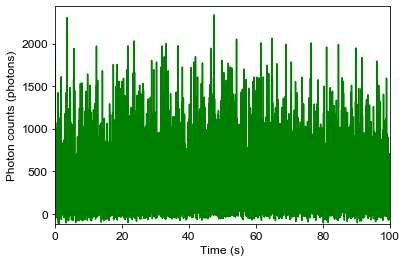

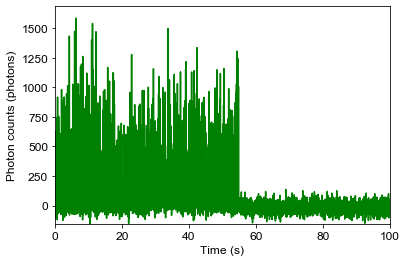

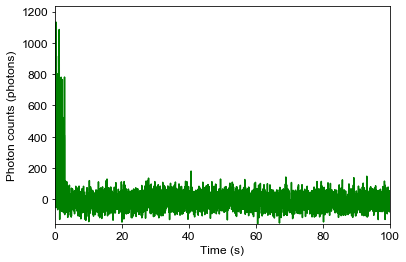

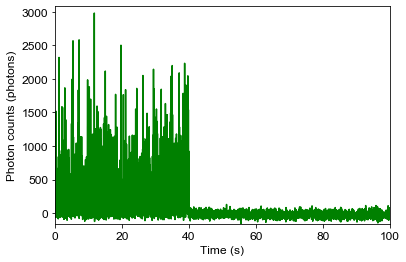

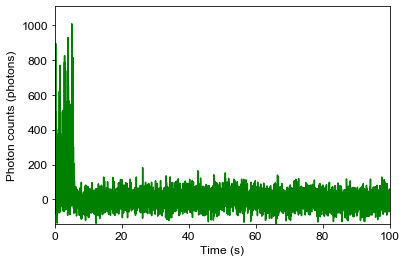

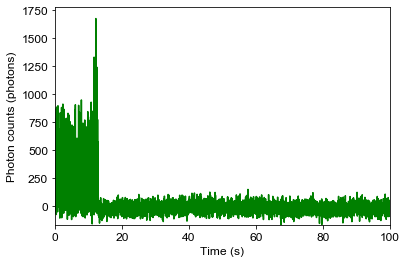

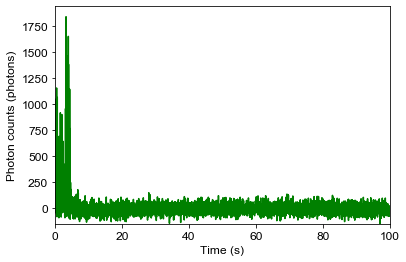

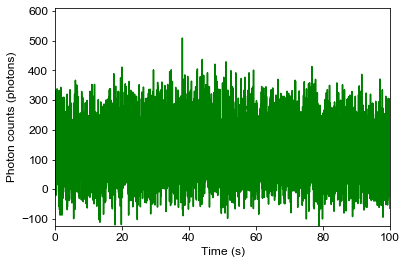

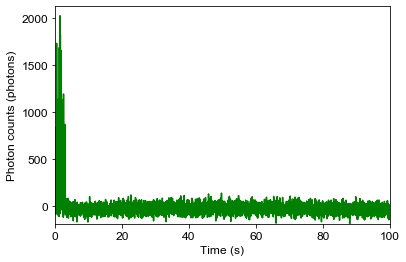

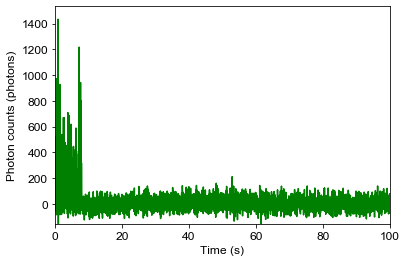

In [5]:
files=icd.fn_import_csv(folder)


for x in range(len(files)):
    data = np.genfromtxt(files[x], delimiter='\t', dtype=np.str)
    y_coords=data[:,1]
    x_coords=data[:,0]
    data = np.delete(data,(0,1), axis=1)
    data = np.delete(data, (0), axis=0)
    data= data.astype(np.float)
    
    for i in range(len(data)):   #1-538 all rows down column i.e. all molecules
        photon_count = 0
        frame_on_sum_count=0
        frame_off_sum_count=0
        on_frame = np.zeros(number_of_frames)
        for j in range(len(data[i])): #for each molecule
            if data[i][j] >= intensity_threshold:
                on_frame[j]=1
                photon_count = photon_count + data[i][j] #keeping track of total number of photons detected throughout the movie
                frame_on_sum_count=frame_on_sum_count+1
            else:
                frame_off_sum_count=frame_off_sum_count+1
  
        on_time.append(on_frame)
        on_time_sum.append(frame_on_sum_count)
        off_time_sum.append(frame_off_sum_count)
        if photon_count>0:
            total_photon.append(photon_count)
        else:
            total_photon.append(np.nan)
        
        #plot intensity traces
        PPplt.fn_intensitytrace(subfolder_name,folder,data,time,i,x_coords,y_coords)

on_time_sum_secs = [z * exposure_time for z in on_time_sum]  

### Section 3- Calculate number of blinks

In [6]:
for i in range (0,len(on_time)):
    num_blinks=0
    for j in range(0,len(on_time[i])-1):
        
        if on_time[i][j]==1:
            if on_time[i][j+1]==0:
                num_blinks=num_blinks+1
    
    if num_blinks>0:
        total_blinks.append(num_blinks)   

### Section 4- Calculate duty cycle

In [7]:
duty_cycle=np.zeros(len(on_time_sum))

for i in range(0,len(on_time_sum)):
    if off_time_sum[i]>0 and on_time_sum[i]>0:
        duty_cycle[i]=on_time_sum[i]/off_time_sum[i]
    else:
        duty_cycle[i]=np.nan

### Section 5- Calculate photon flux

In [8]:
mean_photons_per_sec=np.zeros(len(on_time_sum))

for i in range(len(on_time_sum)):
    mean_photons_per_sec[i]=total_photon[i]/on_time_sum_secs[i]

### Section 6- Mean on-state time

In [9]:
mean_on_state_time=np.zeros(len(on_time_sum))
for i in range(len(on_time_sum)):
    mean_on_state_time[i]=on_time_sum[i]/total_blinks[i]

### Section 7- Plotting

In [10]:
distribution_options=['normal','lognormal']

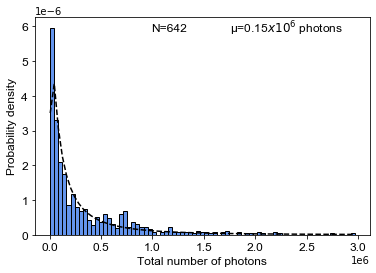

In [11]:
#Choose distribution 0 for normal and 1 for lognormal
#distribution_selection=distribution_options[1]
PPplt.fn_total_photon_hist(subfolder_name,folder,total_photon)

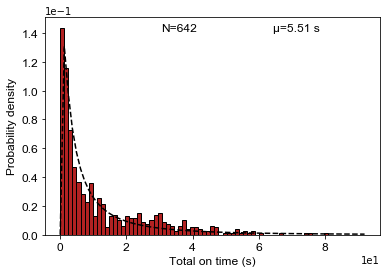

In [12]:
#Choose distribution 0 for normal and 1 for lognormal
#distribution_selection=distribution_options[1]
PPplt.fn_total_ontime_hist(subfolder_name,folder,on_time_sum_secs)

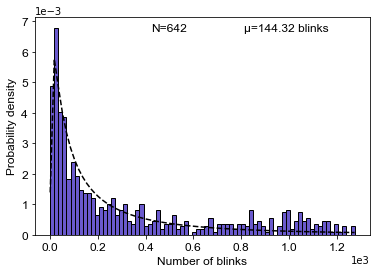

In [13]:
#Choose distribution 0 for normal and 1 for lognormal
#distribution_selection=distribution_options[1]
PPplt.fn_total_blinks_hist(subfolder_name,folder,total_blinks)

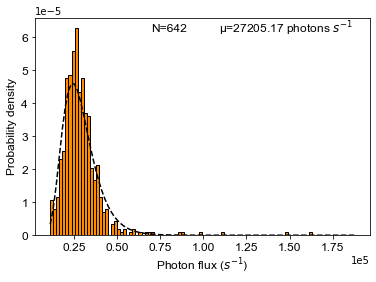

In [14]:
#Choose distribution 0 for normal and 1 for lognormal
#distribution_selection=distribution_options[1]
PPplt.fn_photonflux_hist(subfolder_name,folder,mean_photons_per_sec)

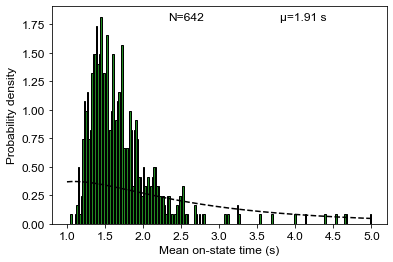

In [16]:
#Choose distribution 0 for normal and 1 for lognormal
distribution_selection=distribution_options[1]
PPplt.fn_onstatetime_hist(subfolder_name,folder,mean_on_state_time,distribution_selection)